# Анализ оттока клиентов банка.

Задача — проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

- Первый этап - изучение общий информации.
- Второй этап - предобработка данных.
- Третий этап - анализ данных.
- Четвертый этап - проверка гипотез
- Пятый  этап - общий вывод.

Датасет содержит данные о клиентах банка «Метанпром». 

Среди данных у нас есть:

- user_id — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- objects — количество объектов в собственности,
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- loyalty — активный клиент,
- estimated_salary — заработная плата клиента,
- churn — ушёл клиент из банка или нет.

##   Изучение общий информации. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/bank_dataset.csv')
except:
    data = pd.read_csv('C:\\Users\\User\\Desktop\\fin_pr\\bank_dataset.csv')
    
data_copy_1 = data

data.head(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


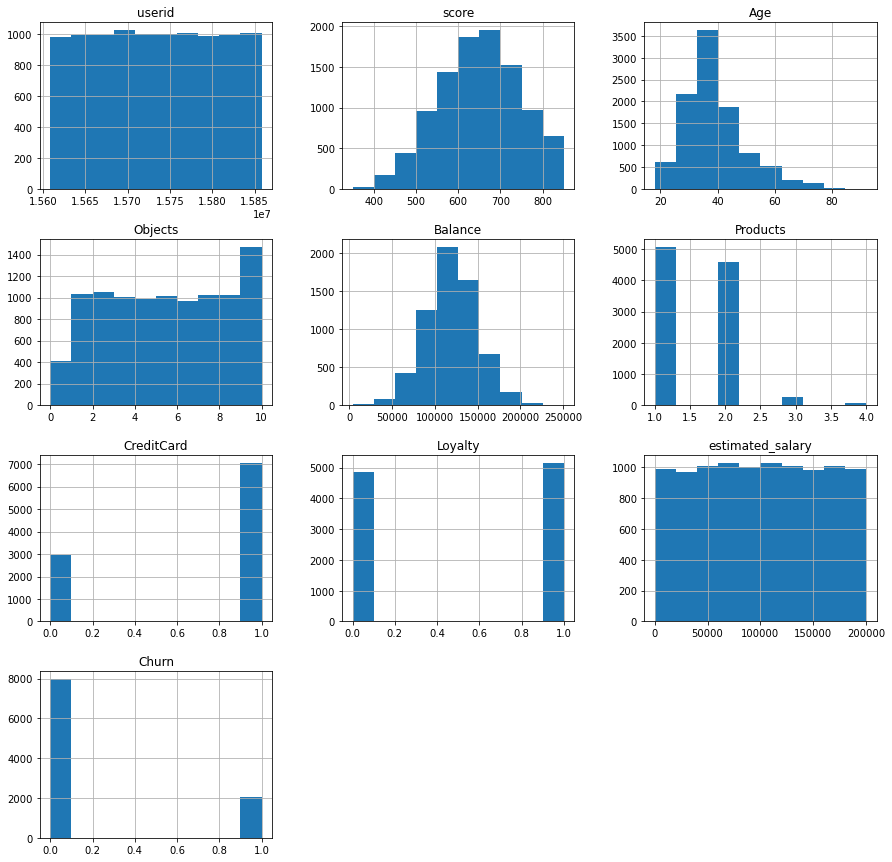

In [3]:

data.hist(figsize=(15, 15));

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Нужна привести колонки к нижнему регистру и скорректировать название колонки CreditCard и userid, провести проверку на дубликаты и пропуски.

## Предобработка данных.

In [5]:
data_code = data
data_code = data_code.rename(columns={'CreditCard' : 'credit_card', 'userid' : 'user_id'})
data_code.columns = data_code.columns.str.lower()

In [6]:
data = data.rename(columns={'CreditCard' : 'credit_card', 'userid' : 'user_id'})
data.columns = data.columns.str.lower()

data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Проверим данные на аномалии.

In [7]:
print('Смотрим возраст.')
print(data['age'].describe())
print('Смотрим баланс.')
print(data['balance'].describe())
print('Смотрим продукты.')
print(data['products'].value_counts())
print('Смотрим обекты.')
print(data['objects'].value_counts())

Смотрим возраст.
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64
Смотрим баланс.
count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64
Смотрим продукты.
1    5084
2    4590
3     266
4      60
Name: products, dtype: int64
Смотрим обекты.
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64


Посмотрим разброс среди дохода по кредитным баллам на аномалиям.


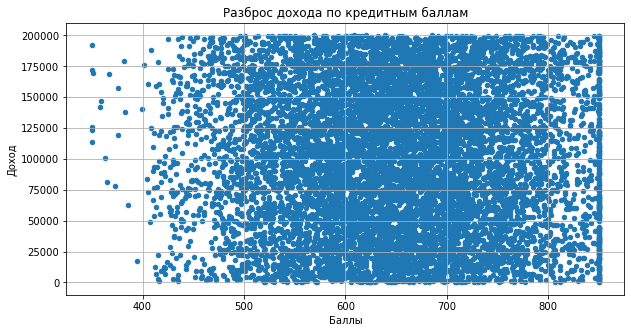

In [8]:
print('Посмотрим разброс среди дохода по кредитным баллам на аномалиям.')
data.plot(kind='scatter', x='score', y='estimated_salary', grid=True, figsize=(10, 5))
plt.title('Разброс дохода по кредитным баллам')
plt.xlabel('Баллы')
plt.ylabel('Доход')
plt.show()

Больших проблем с аномалиями нет. 

Сделаем данные некоторых категорий более понятными, заменим в колонках credit_card, loyalty и churn, нули и единицы на подходящие текстовые категории.

In [9]:
data['credit_card']= data['credit_card'].apply(lambda x: 'есть карта' if x == 1 else 'отсутствует')
data['loyalty']= data['loyalty'].apply(lambda x: 'активен' if x == 1 else 'не активен')
data['churn']= data['churn'].apply(lambda x: 'отточные' if x == 1 else 'неотточные')
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,есть карта,активен,101348.88,отточные
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,отсутствует,активен,112542.58,неотточные
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,есть карта,не активен,113931.57,отточные
3,15744090,699,Ярославль,Ж,39,1,NaN,2,отсутствует,не активен,93826.63,неотточные
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,есть карта,активен,79084.10,неотточные


Проверим данные на дубликаты.

In [10]:
print('Количество дубликатов:', data.duplicated().sum())
print('Количество неявных дубликатов:', data['user_id'].duplicated().sum())
print('Количество неявных дубликатов:', data['estimated_salary'].duplicated().sum())

Количество дубликатов: 0
Количество неявных дубликатов: 0
Количество неявных дубликатов: 1


Исследуем пропущенные значения.

In [11]:
data_1 = data
data_1 = data_1.query('balance.isna() | balance == 0')
data_1.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,есть карта,активен,101348.88,отточные
3,15744090,699,Ярославль,Ж,39,1,NaN,2,отсутствует,не активен,93826.63,неотточные
6,15635267,822,Ярославль,М,50,7,NaN,2,есть карта,активен,10062.80,неотточные
11,15779909,497,Рыбинск,М,24,3,NaN,2,есть карта,не активен,76390.01,неотточные
12,15675000,476,Ярославль,Ж,34,10,NaN,2,есть карта,не активен,26260.98,неотточные


In [12]:
city_y = data.query('city == "Ярославль"')
city_r = data.query('city == "Рыбинск"')
city_rv = data.query('city == "Ростов Великий"')

In [13]:
print('Пропуски в столбце balance по городу Ярославль:', city_y['balance'].isna().sum())


Пропуски в столбце balance по городу Ярославль: 2418


In [14]:
print('Пропуски в столбце balance по городу Рыбинск:', city_r['balance'].isna().sum())

Пропуски в столбце balance по городу Рыбинск: 1199


In [15]:
print('Пропуски в столбце balance по городу Ростов Великий:', city_rv['balance'].isna().sum())

Пропуски в столбце balance по городу Ростов Великий: 0


Основные пропуски в городе Ярославль и Рыбинск, в городе Ростов Великий пропусков в данных нет.

Пропуске в колонке balance скорее всего находятся у тех клиентов чей счет нулевой. Заменим пропуски на 0.

In [16]:
data['balance'] = data['balance'].fillna(0)
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0.00,1,есть карта,активен,101348.88,отточные
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,отсутствует,активен,112542.58,неотточные
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,есть карта,не активен,113931.57,отточные
3,15744090,699,Ярославль,Ж,39,1,0.00,2,отсутствует,не активен,93826.63,неотточные
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,есть карта,активен,79084.10,неотточные


Посмотрим на распределение и добавим новые категории для анализа.

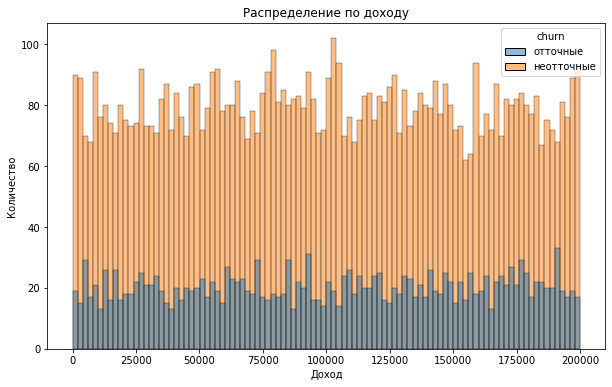

In [17]:
sns.histplot(data=data, x='estimated_salary', hue='churn', bins=100)
plt.gcf().set_size_inches(10, 6)
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.title("Распределение по доходу");

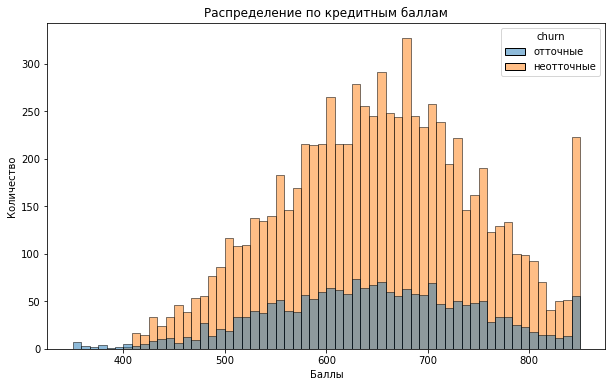

In [18]:
sns.histplot(data=data, x='score', hue='churn', bins=60)
plt.gcf().set_size_inches(10, 6)
plt.xlabel('Баллы')
plt.ylabel('Количество')
plt.title("Распределение по кредитным баллам");

Очень сильно выделяется количество клиентов получивших практически максимальное количество баллов, клиентов более 200.

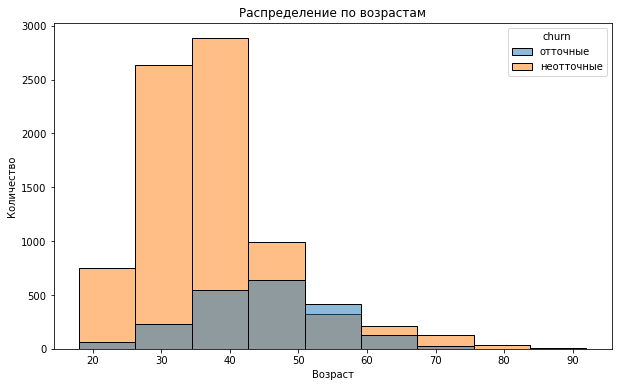

In [19]:
sns.histplot(data=data, x='age', hue='churn', bins=9)
plt.gcf().set_size_inches(10, 6)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title("Распределение по возрастам");

In [20]:
def categorize_income(row):
    try:
        if 0 <= row <= 30000:
            return 'D'
        elif 30001 <= row <= 50000:
            return 'C'
        elif 50001 <= row <= 100000:
            return 'B'
        elif row >= 100001:
            return 'A'
    except:
        pass

In [21]:
data['income'] = data['estimated_salary'].apply(categorize_income)

In [22]:
print(data['score'].describe())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score, dtype: float64


Банк использует 850 бальную скоринговую систему. Категорезируем данные.

In [23]:
def categorize_score(row):
    try:
        if 0 <= row <= 500:
            return 'Очень низкий'
        elif 501 <= row <= 600:
            return 'Низкий'
        elif 601 <= row <= 650:
            return 'Средний'
        elif 651 <= row <= 690:
            return 'Хороший'
        elif row >= 691:
            return 'Отличный'
    except:
        pass

In [24]:
data['rating'] = data['score'].apply(categorize_score)

In [25]:
def categorize_age(row):
    try:
        if 18 <= row <= 30:
            return '18-30'
        elif 31 <= row <= 40:
            return '31-40'
        elif 41 <= row <= 50:
            return '41-50'
        elif row >= 51:
            return '51+'
    except:
        pass

In [26]:
data['age_category'] = data['age'].apply(categorize_age)
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,income,rating,age_category
0,15677338,619,Ярославль,Ж,42,2,0.00,1,есть карта,активен,101348.88,отточные,A,Средний,41-50
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,отсутствует,активен,112542.58,неотточные,A,Средний,41-50
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,есть карта,не активен,113931.57,отточные,A,Низкий,41-50
3,15744090,699,Ярославль,Ж,39,1,0.00,2,отсутствует,не активен,93826.63,неотточные,B,Отличный,31-40
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,есть карта,активен,79084.10,неотточные,B,Отличный,41-50


Кодируем данные по городам и полу, подготавливаем для этого таблицу.

In [27]:
data_code.head(10)
data_code['balance'] = data_code['balance'].fillna(0)
#data_code['gender_categor'] = data['gender'].apply(lambda x: 1 if x == 'М' else 0)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [29]:
data_bin = pd.get_dummies(data_code['city'])
gender_bin = pd.get_dummies(data_code['gender'])

In [30]:
data_code['yaroslavl'] = data_bin['Ярославль']
data_code['rybinsk'] = data_bin['Рыбинск']
data_code['rostov_velikiy'] = data_bin['Ростов Великий']
data_code['female'] = gender_bin['Ж']
data_code['male'] = gender_bin['М']
data_code = data_code.drop(columns='objects')

In [31]:
data_code.head()

,user_id,score,city,gender,age,balance,products,credit_card,loyalty,estimated_salary,churn,yaroslavl,rybinsk,rostov_velikiy,female,male
0,15677338,619,Ярославль,Ж,42,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15690047,608,Рыбинск,Ж,41,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,Ярославль,Ж,42,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15744090,699,Ярославль,Ж,39,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15780624,850,Рыбинск,Ж,43,125510.82,1,1,1,79084.10,0,0,1,0,1,0


## Анализ данных ушедших и оставшихся клиентов.

In [32]:
churn_data = data.pivot_table(index='churn', values='user_id', aggfunc='count')
count = data['user_id'].count()
churn_data['churn_%'] = (churn_data['user_id'] / count) * 100
churn_data.reset_index()

,churn,user_id,churn_%
0,неотточные,7963,79.63
1,отточные,2037,20.37


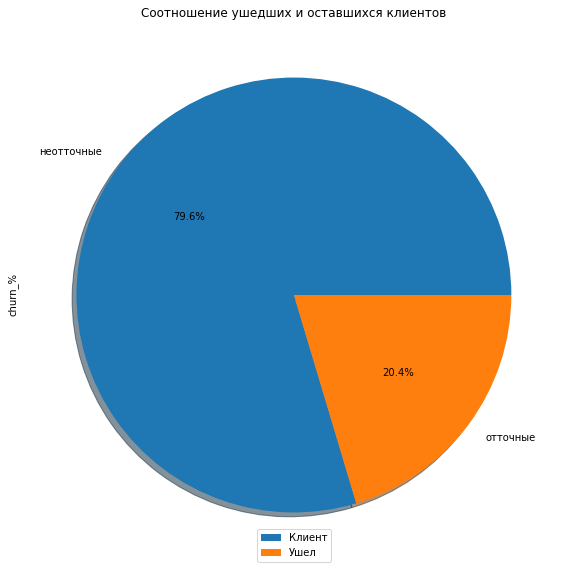

In [33]:
churn_data.plot(kind='pie', x='churn', y='churn_%',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=8, fontsize=10, labels=( 'Клиент','Ушел'))
plt.title('Соотношение ушедших и оставшихся клиентов')
plt.show()

Около 20% клиентов считаются ушедшими из банка.

### Смотрим соотношение ушедших и оставшихся клиентов по городам.

In [34]:
data_city = data.pivot_table(index='city', values='user_id', aggfunc='count')
data_city['city_%'] = (data_city['user_id'] / count) * 100
data_city.reset_index()

,city,user_id,city_%
0,Ростов Великий,2509,25.09
1,Рыбинск,2477,24.77
2,Ярославль,5014,50.14


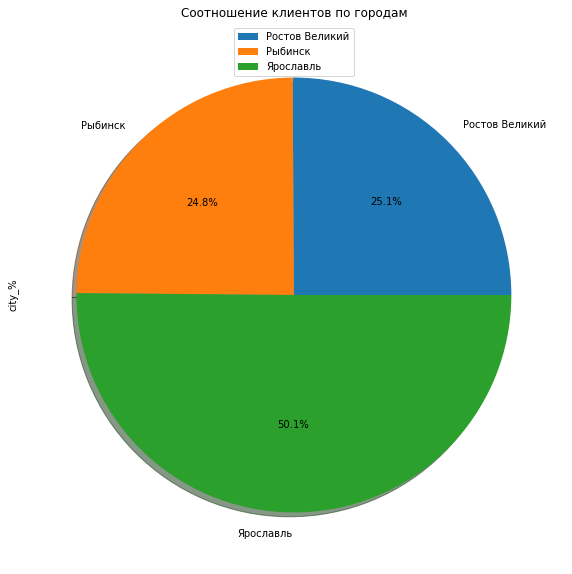

In [35]:
data_city.plot(kind='pie', x='city', y='city_%',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=9, fontsize=10, labels=('Ростов Великий', 'Рыбинск', 'Ярославль'))
plt.title('Cоотношение клиентов по городам')
plt.show()

Половина клиентов банка живут в Ярославле(около 50%), остальных делит между собой Рыбинск и Ростов Великий(около 25% на город).

In [36]:
group_city = data.groupby(['city', 'churn'], \
                       as_index = False)[['user_id']].count().sort_values(by='city', ascending=False)
group_city['city_%'] = (group_city['user_id'] / count) * 100
group_city

,city,churn,user_id,city_%
4,Ярославль,неотточные,4204,42.04
5,Ярославль,отточные,810,8.10
2,Рыбинск,неотточные,2064,20.64
3,Рыбинск,отточные,413,4.13
0,Ростов Великий,неотточные,1695,16.95
1,Ростов Великий,отточные,814,8.14


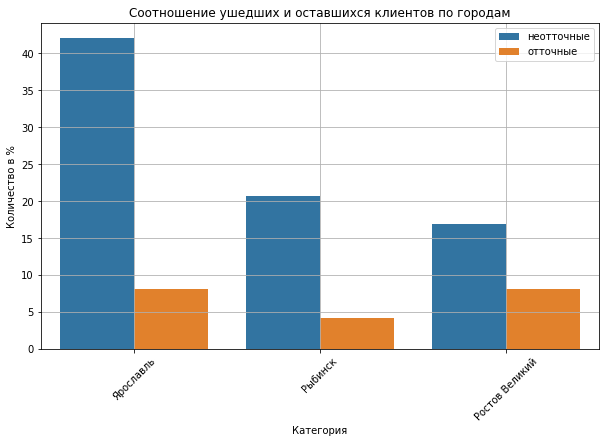

In [37]:
sns.barplot(data=group_city, x='city', y='city_%', hue='churn')
plt.xticks(rotation=45)
plt.grid()
plt.legend(fontsize=10)
plt.gcf().set_size_inches(10, 6)
plt.title('Cоотношение ушедших и оставшихся клиентов по городам')
plt.xlabel('Категория')
plt.ylabel('Количество в %');

In [38]:
city_1 = data.query('city == "Ярославль"')
city_2 = data.query('city == "Рыбинск"')
city_3 = data.query('city == "Ростов Великий"')

In [39]:
count_1 = city_1['user_id'].count()
count_2 = city_2['user_id'].count()
count_3 = city_3['user_id'].count()

In [40]:
city_1_p = city_1.pivot_table(index='churn', values='user_id', aggfunc='count')
city_1_p['churn_%'] = (city_1_p['user_id'] / count_1) * 100
city_2_p = city_2.pivot_table(index='churn', values='user_id', aggfunc='count')
city_2_p['churn_%'] = (city_2_p['user_id'] / count_2) * 100
city_3_p = city_3.pivot_table(index='churn', values='user_id', aggfunc='count')
city_3_p['churn_%'] = (city_3_p['user_id'] / count_3) * 100

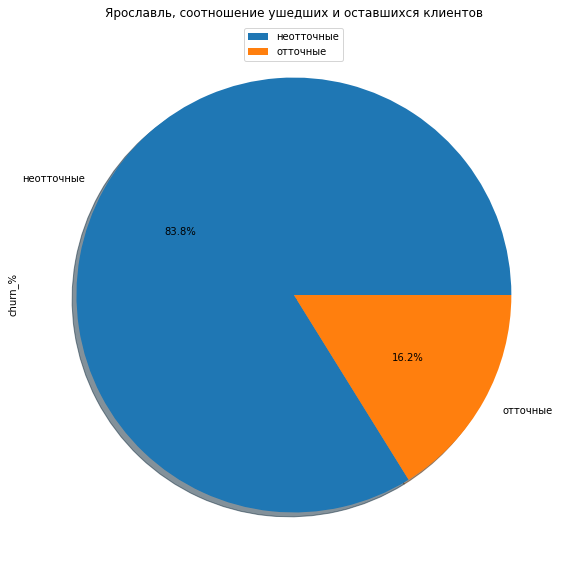

In [41]:
city_1_p.plot(kind='pie', x='churn', y='churn_%',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=9, fontsize=10)
plt.title('Ярославль, cоотношение ушедших и оставшихся клиентов')
plt.show()

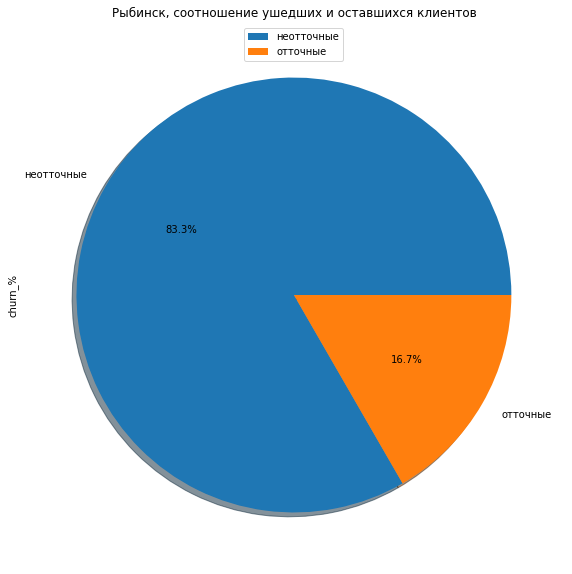

In [42]:
city_2_p.plot(kind='pie', x='churn', y='churn_%',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=9, fontsize=10)
plt.title('Рыбинск, cоотношение ушедших и оставшихся клиентов')
plt.show()

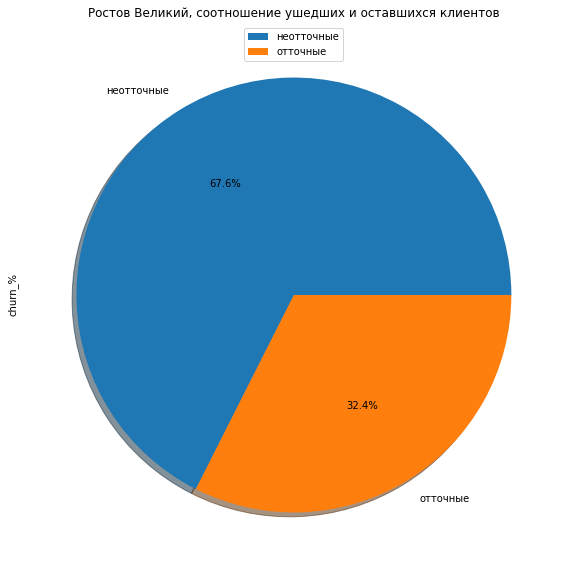

In [43]:
city_3_p.plot(kind='pie', x='churn', y='churn_%',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=9, fontsize=10)
plt.title('Ростов Великий, cоотношение ушедших и оставшихся клиентов')
plt.show()

Наибольший отток клиентов в Ростове Великом, он равняется 32.4%.

### Смотрим соотношение ушедших и оставшихся клиентов среди мужчин и женщин

In [44]:
data_gender = data.pivot_table(index='gender', values='user_id', aggfunc='count')
data_gender['gender_%'] = (data_gender['user_id'] / count) * 100
data_gender.reset_index()

,gender,user_id,gender_%
0,Ж,4543,45.43
1,М,5457,54.57


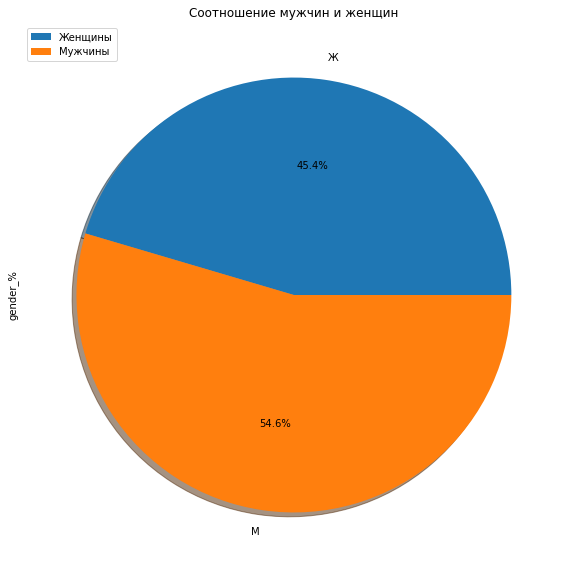

In [45]:
data_gender.plot(kind='pie', x='gender', y='gender_%',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=2, fontsize=10, labels=('Женщины', 'Мужчины'))
plt.title('Соотношение мужчин и женщин')
plt.show()

Среди клиентов банка 54% мужчины и 45% женщины.

In [46]:
group_gender = data.groupby(['gender', 'churn'], \
                       as_index = False)[['user_id']].count().sort_values(by='user_id', ascending=False)
group_gender['gender_%'] = (group_gender['user_id'] / count) * 100
group_gender

,gender,churn,user_id,gender_%
2,М,неотточные,4559,45.59
0,Ж,неотточные,3404,34.04
1,Ж,отточные,1139,11.39
3,М,отточные,898,8.98


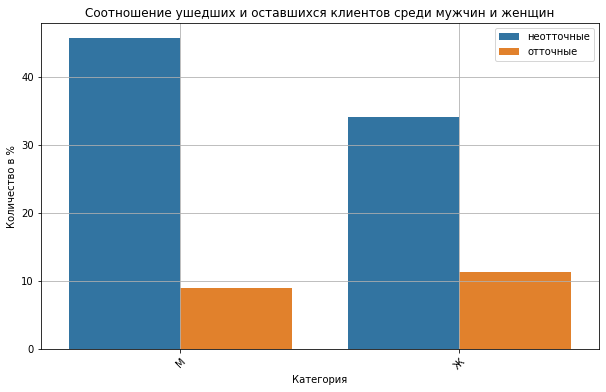

In [47]:
sns.barplot(data=group_gender, x='gender', y='gender_%', hue='churn')
plt.xticks(rotation=45)
plt.grid()
plt.legend(fontsize=10)
plt.gcf().set_size_inches(10, 6)
plt.title('Соотношение ушедших и оставшихся клиентов среди мужчин и женщин')
plt.xlabel('Категория')
plt.ylabel('Количество в %');

Среди мужчин отток меньше чем среди женщин, примерно 45%  оставшихся от общего числа эта мужчины когда на женщин приходится около 34%. Отток мужчин около 9%, а женщин 11,4%. 

### Смотрим средний возраст ушедших и оставшихся клиентов.

In [48]:
data_age = data.pivot_table(index='churn', values='age', aggfunc='median')
data_age.reset_index()

,churn,age
0,неотточные,36
1,отточные,45


age_category = data.groupby(['age_category', 'churn'], \
                       as_index = False)[['user_id']].count().sort_values(by='user_id', ascending=False)



In [49]:
age_category = data.pivot_table(index=['age_category', 'churn'], values='user_id', aggfunc='count')
age_category['age_%'] = (age_category['user_id'] / count) * 100
age_grf = age_category.reset_index()
age_category.reset_index()

,age_category,churn,user_id,age_%
0,18-30,неотточные,1820,18.20
1,18-30,отточные,148,1.48
2,31-40,неотточные,3913,39.13
3,31-40,отточные,538,5.38
4,41-50,неотточные,1532,15.32
5,41-50,отточные,788,7.88
6,51+,неотточные,698,6.98
7,51+,отточные,563,5.63


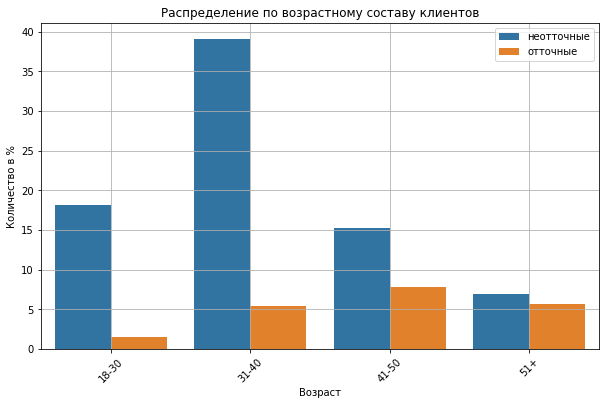

In [50]:
sns.barplot(data=age_grf, x='age_category', y='age_%', hue='churn')
plt.xticks(rotation=45)
plt.grid()
plt.legend(fontsize=10)
plt.gcf().set_size_inches(10, 6)
plt.title('Распределение по возрастному составу клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество в %');

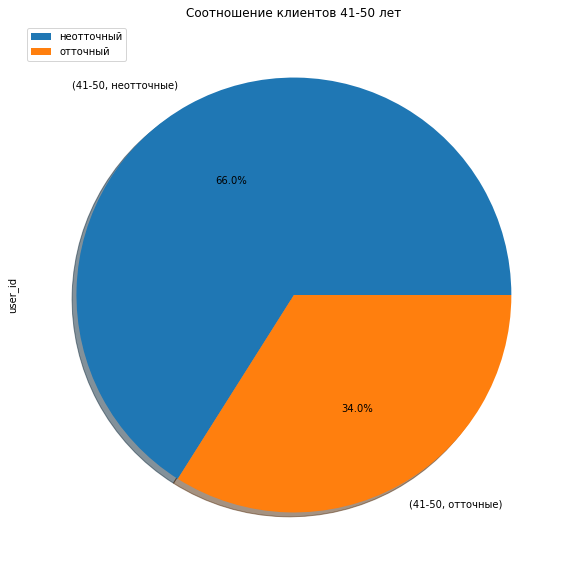

In [51]:
age_45 = age_category.query('age_category == "41-50"')
age_45.plot(kind='pie', x='age_category', y='user_id',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=2, fontsize=10, labels=('неотточный', 'отточный'))
plt.title('Соотношение клиентов 41-50 лет')
plt.show()

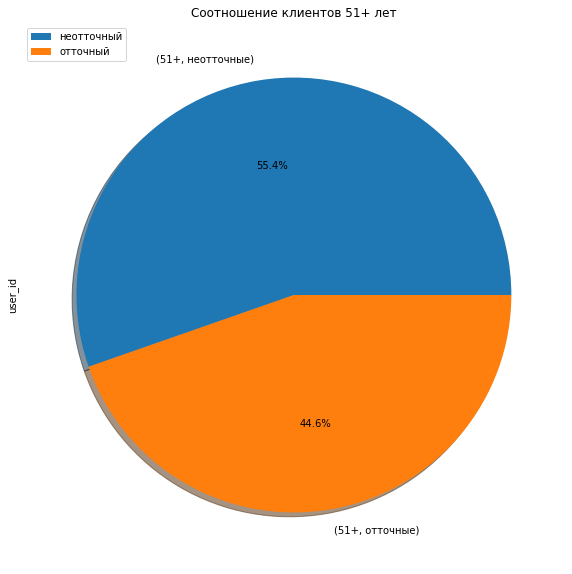

In [52]:
age_51 = age_category.query('age_category == "51+"')
age_51.plot(kind='pie', x='age_category', y='user_id',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=2, fontsize=10, labels=('неотточный', 'отточный'))
plt.title('Соотношение клиентов 51+ лет')
plt.show()

Более великовозрастные клиенты чаще склонны уходить из банка чем более молодые клиенты. Если сравнивать категории то в 41-50 ушло 34%, а в 51+ уходит чуть меньше чем половина клиентов.

### Изучим сколько  ушедших и оставшихся клиентов используют кредитные караты.

In [53]:
credit_card = data.pivot_table(index=['credit_card', 'churn'], values='user_id', aggfunc='count').reset_index()
credit_card['credit_card%'] = (credit_card['user_id'] / count) * 100
credit_card

,credit_card,churn,user_id,credit_card%
0,есть карта,неотточные,5631,56.31
1,есть карта,отточные,1424,14.24
2,отсутствует,неотточные,2332,23.32
3,отсутствует,отточные,613,6.13


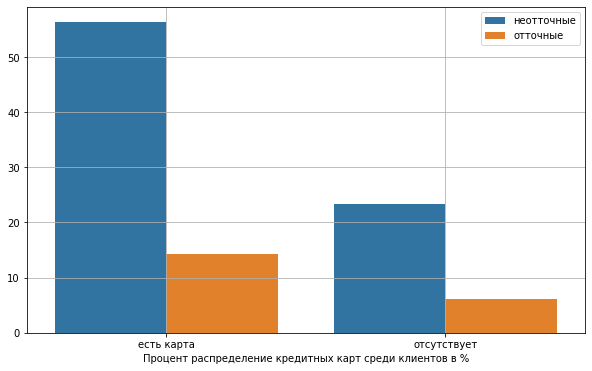

In [54]:
sns.barplot(data=credit_card, x='credit_card', y='credit_card%', hue='churn')

plt.grid()
plt.legend(fontsize=10)
plt.gcf().set_size_inches(10, 6)
plt.xlabel('Процент распределение кредитных карт среди клиентов в %')
plt.ylabel('');

У тех кто имеет кредитную карту отток 14%, у тех кто картой не владеет отток 6%. 

### Смотрим соотношение ушедших и оставшихся клиентов по активности

In [55]:
data_loyalty = data.pivot_table(index=['loyalty', 'churn'], values='user_id', aggfunc='count').reset_index()
data_loyalty['loyalty_%'] = (data_loyalty['user_id'] / count) * 100
data_loyalty

,loyalty,churn,user_id,loyalty_%
0,активен,неотточные,4416,44.16
1,активен,отточные,735,7.35
2,не активен,неотточные,3547,35.47
3,не активен,отточные,1302,13.02


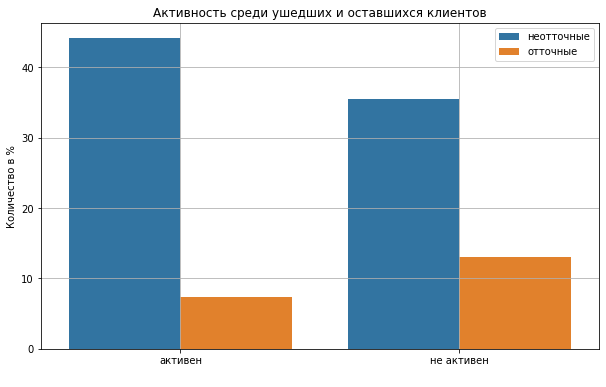

In [56]:
sns.barplot(data=data_loyalty, x='loyalty', y='loyalty_%', hue='churn')
plt.grid()
plt.legend(fontsize=10)
plt.gcf().set_size_inches(10, 6)
plt.title('Активность среди ушедших и оставшихся клиентов')
plt.ylabel('Количество в %')
plt.xlabel(' ');

Не активные клиенты чаще уходят чем активные.

### Смотрим соотношение ушедших и оставшихся клиентов по доходу

In [57]:
median_salary = (data.pivot_table(index='churn', values='estimated_salary', aggfunc='median')
                 .reset_index())
median_salary

,churn,estimated_salary
0,неотточные,99645.04
1,отточные,102460.84


Медийный доход ушедших и оставшихся клиентов


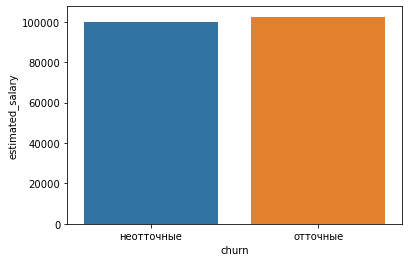

In [58]:
print('Медийный доход ушедших и оставшихся клиентов')
sns.barplot(x = median_salary['churn'], y = median_salary['estimated_salary']);

Большого разрыва в медийной заработной плате среди ушедших и оставшихся клиентов нет. Посмотрим как распределяется доход по категориям.

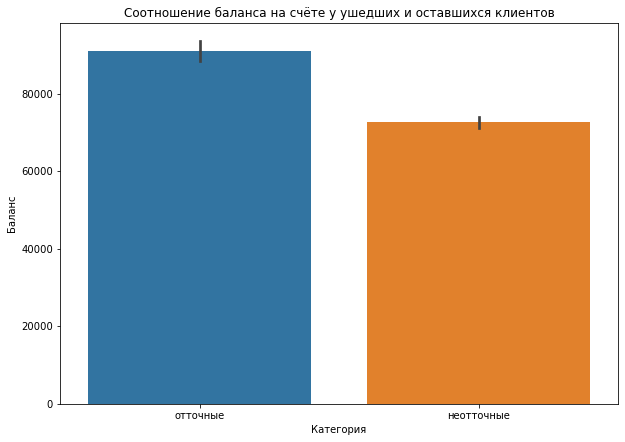

In [59]:
sns.barplot(x = data['churn'], y = data['balance'])
plt.title('Соотношение баланса на счёте у ушедших и оставшихся клиентов')
plt.xlabel('Категория')
plt.ylabel('Баланс')
plt.gcf().set_size_inches(10,7);

Счет на балансе у неотточных клиентов ниже чем у ушедших.  

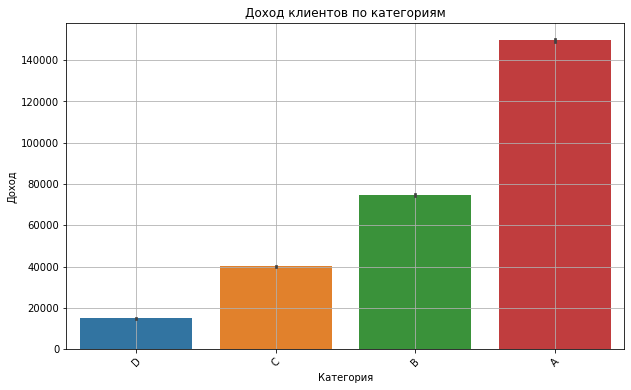

In [60]:
sns.barplot(x = data['income'].sort_values(ascending=False), y = data['estimated_salary']);
plt.xticks(rotation=45)
plt.grid()
plt.gcf().set_size_inches(10, 6)
plt.title('Доход клиентов по категориям')
plt.xlabel('Категория')
plt.ylabel('Доход');

Средний доход в категориях примерно равен: 
- A - 150000;
- B - 70000;
- С - 40000;
- В - 15000.

In [61]:
income_category = data.pivot_table(index=['income', 'churn'], values='user_id', aggfunc='count').reset_index()
income_category['churn_%'] = (income_category['user_id'] / count) * 100
income_category

,income,churn,user_id,churn_%
0,A,неотточные,3966,39.66
1,A,отточные,1044,10.44
2,B,неотточные,2033,20.33
3,B,отточные,504,5.04
4,C,неотточные,788,7.88
5,C,отточные,187,1.87
6,D,неотточные,1176,11.76
7,D,отточные,302,3.02


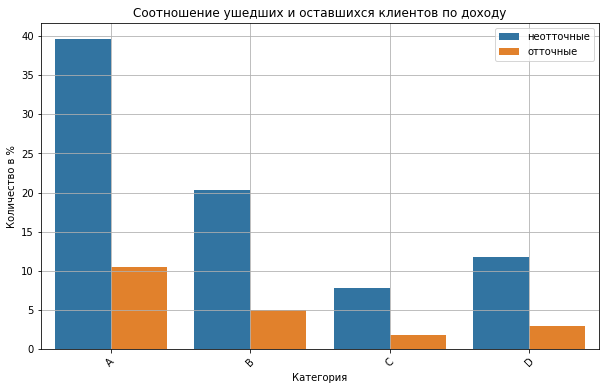

In [62]:
sns.barplot(data=income_category, x='income', y='churn_%', hue='churn')
plt.xticks(rotation=45)
plt.grid()
plt.legend(fontsize=10)
plt.gcf().set_size_inches(10, 6)
plt.title('Cоотношение ушедших и оставшихся клиентов по доходу')
plt.xlabel('Категория')
plt.ylabel('Количество в %');

По данным Росстата за 2019 год наиболее распространенная заработанная плата в Ярославской области в районе 40000 рублей, основной клиент банка имеет зарплату в среднем около 70000 и выше. Отток  равен 10% от общего числа в категории А и 5% в категории B.

### Посмотрим как банк распределил баллы кредитного скоринга среди клиентов. 

In [63]:
data_score = (data.pivot_table(index=['rating', 'churn'], values='user_id', aggfunc='count')
              .sort_values(by='user_id', ascending=False)
              .reset_index()
             )
data_score['score_%'] = (data_score['user_id'] / count) * 100
data_score

,rating,churn,user_id,score_%
0,Отличный,неотточные,2783,27.83
1,Низкий,неотточные,1910,19.10
2,Средний,неотточные,1479,14.79
3,Хороший,неотточные,1300,13.00
4,Отличный,отточные,689,6.89
5,Низкий,отточные,513,5.13
6,Очень низкий,неотточные,491,4.91
7,Средний,отточные,392,3.92
8,Хороший,отточные,291,2.91
9,Очень низкий,отточные,152,1.52


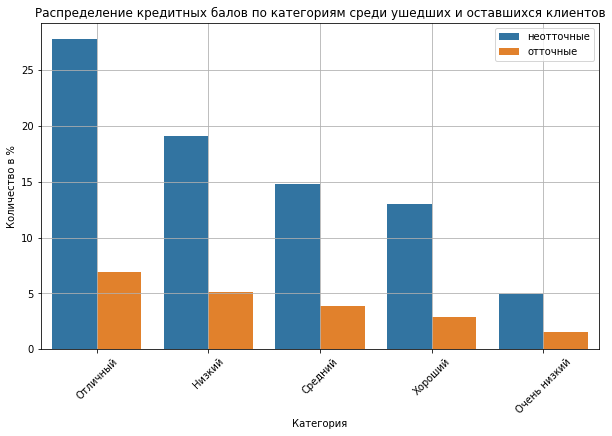

In [64]:
sns.barplot(data=data_score, x='rating', y='score_%', hue='churn')
plt.xticks(rotation=45)
plt.grid()
plt.legend(fontsize=10)
plt.gcf().set_size_inches(10, 6)
plt.title('Распределение кредитных балов по категориям среди ушедших и оставшихся клиентов')
plt.xlabel('Категория')
plt.ylabel('Количество в %');

Наибольшие количество клиентов среди тех у кого отличные показатели по баллам и те у кого низкие показатели.

### Смотрим соотношение ушедших и оставшихся клиентов среди  количества продуктов

In [65]:
products_data = (data.pivot_table(index=['products', 'churn'], values='user_id', aggfunc='count')
                 .reset_index())
products_data['products_%'] = (products_data['user_id'] / count) * 100
products_data.reset_index()

,index,products,churn,user_id,products_%
0,0,1,неотточные,3675,36.75
1,1,1,отточные,1409,14.09
2,2,2,неотточные,4242,42.42
3,3,2,отточные,348,3.48
4,4,3,неотточные,46,0.46
5,5,3,отточные,220,2.20
6,6,4,отточные,60,0.60


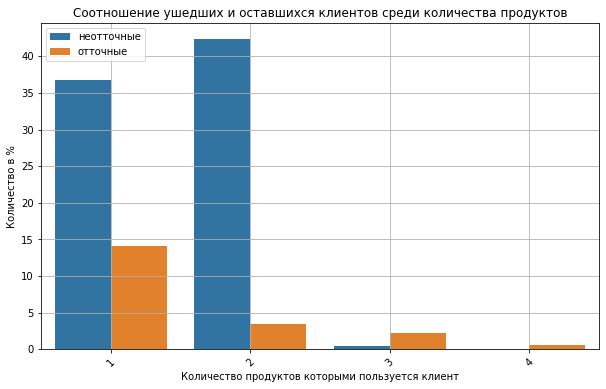

In [66]:
sns.barplot(data=products_data, x='products', y='products_%', hue='churn')
plt.xticks(rotation=45)
plt.grid()
plt.legend(fontsize=10)
plt.gcf().set_size_inches(10, 6)
plt.title('Соотношение ушедших и оставшихся клиентов среди количества продуктов')
plt.xlabel('Количество продуктов которыми пользуется клиент')
plt.ylabel('Количество в %');

На третьем продукте идет наибольший отток на 4 продуктами клиентов практически нет. Отток клиентов с одним продуктом выше чем с двумя, но не превышает оставшихся клиентов как у трех продуктов. 

### Посмотрим отток клиентов по возрастам среди городов с наибольшим количеством ушедших клиентов.

In [67]:
data_copy = data.query('churn == "отточные"')
city_1 = data_copy.query('city == "Ростов Великий"')
count_1 = city_1['user_id'].count()

In [68]:
age_city_1 = (city_1.pivot_table(index=['age_category'], values='user_id', aggfunc='count')
              .sort_values(by='user_id', ascending=False))
age_city_1['age_%'] = (age_city_1['user_id'] / count_1) * 100
age_city_1.reset_index()

,age_category,user_id,age_%
0,41-50,331,40.663391
1,31-40,214,26.289926
2,51+,213,26.167076
3,18-30,56,6.879607


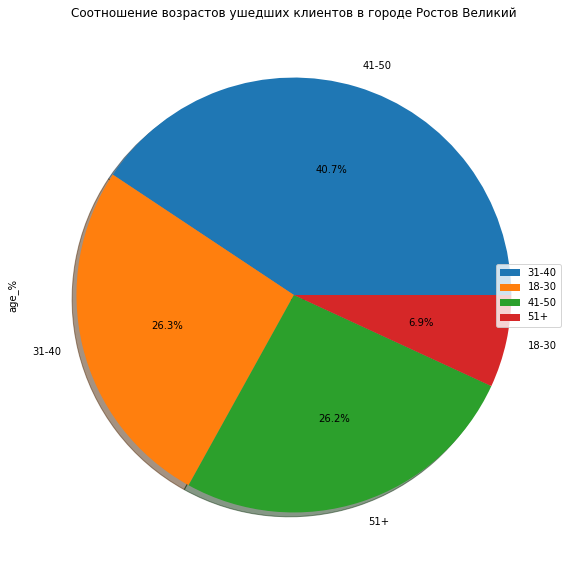

In [69]:
age_city_1.plot(kind='pie', x='age_category', y='age_%',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=5, fontsize=10, labels=('31-40', '18-30', '41-50', '51+'))
plt.title('Соотношение возрастов ушедших клиентов в городе Ростов Великий')
plt.show()

В городе Ростов Великий наибольший отток среди людей возрастом от 40 до 50 лет они составляют 40% ушедших клиентов банка.

### Посмотрим на корреляцию данных.

In [70]:
data_code.corr()
data_code['balance'] = data_code['balance'].fillna(0)

In [71]:
data_code = data_code.drop(columns='city') 
data_code = data_code.drop(columns='user_id') 
#data_code = data_code.drop(columns='score') 
data_code = data_code.drop(columns='gender') 
#data_code = data_code.drop(columns='age') 
#data_code = data_code.drop(columns='balance') 
#data_code = data_code.drop(columns='products') 
#data_code = data_code.drop(columns='estimated_salary') 
#data_code = data_code.drop(columns='objects')
data_code.head()

,score,age,balance,products,credit_card,loyalty,estimated_salary,churn,yaroslavl,rybinsk,rostov_velikiy,female,male
0,619,42,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,502,42,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,0,1,0


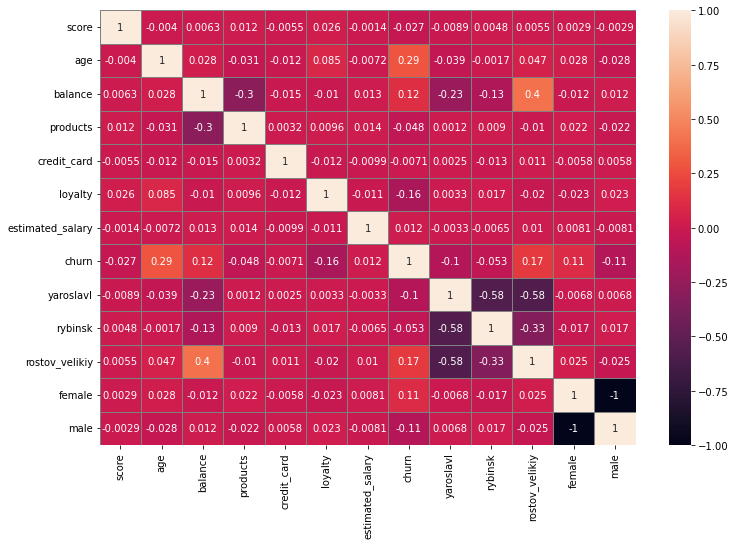

In [72]:
sns.heatmap(data_code.corr(), annot = True, fmt='.2g', linewidths=1, linecolor='grey')
plt.gcf().set_size_inches(12, 8)
plt.show()

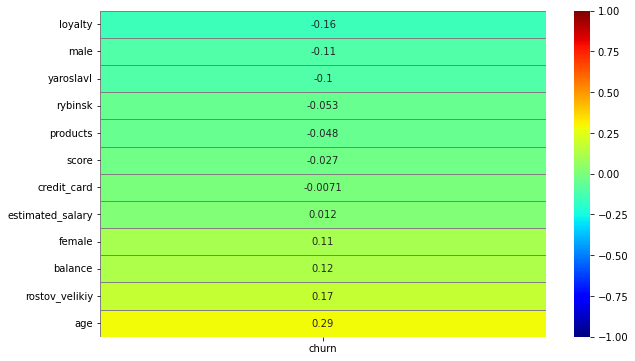

In [73]:
(sns.heatmap(data_code.corr().loc[:,['churn']].drop('churn')
             .sort_values('churn')
             ,annot=True, vmin=-1, vmax=1, center= 0, cmap= 'jet', linewidths=1, linecolor='grey'))
plt.gcf().set_size_inches(10, 6)
plt.show()

Можно выделить сильную корреляцию по полу клиента, у активных/не активных клиентов и у городов Ростов Великий и Ярославль, также стоит обратить внимание на баланс и возраст.

#### Можно выделить несколько сегментов:
- 1.Житель города Ростов Великий в возрасте 40 лет, чей баланс выше 70 000.
- 2.Клиенты в возрасте от 40 лет, считающейся не активным, чей баланс выше 70 000.
- 3.Также можно посмотреть общий разрез сегмента женщины в возрасте 40 лет чей баланс выше 70 000.

In [74]:
#data.head(1)

In [75]:
city_rv = data.query('city == "Ростов Великий"')
city_qrv = city_rv.query('age > 40 and balance > 70000')
count_y = city_qrv['user_id'].count()
#count_y

In [76]:
city_qrv_p = city_qrv.pivot_table(index='churn', values='user_id', aggfunc='count')
city_qrv_p['churn_%'] = (city_qrv_p['user_id'] / count_y) * 100
city_qrv_p

,user_id,churn_%
churn,,
неотточные,466,46.230159
отточные,542,53.769841


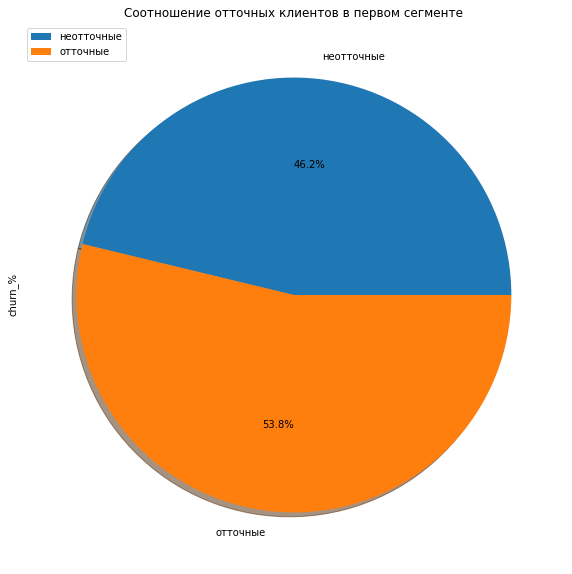

In [77]:
city_qrv_p.plot(kind='pie', x='churn', y='churn_%',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=2, fontsize=10)
plt.title('Соотношение отточных клиентов в первом сегменте')
plt.show()

В первом сегменте количество отточных клиентов 54% что на много больше если сравнивать с общими данными где отток всего 20,4%

In [78]:
city_l = data.query('loyalty == "не активен"')
city_41 = city_l.query('age > 40 and balance > 70000')
count_r = city_41['user_id'].count()
#count_r

In [79]:
city_l_p = city_41.pivot_table(index='churn', values='user_id', aggfunc='count')
city_l_p['churn_%'] = (city_l_p['user_id'] / count_r) * 100
city_l_p

,user_id,churn_%
churn,,
неотточные,464,42.843952
отточные,619,57.156048


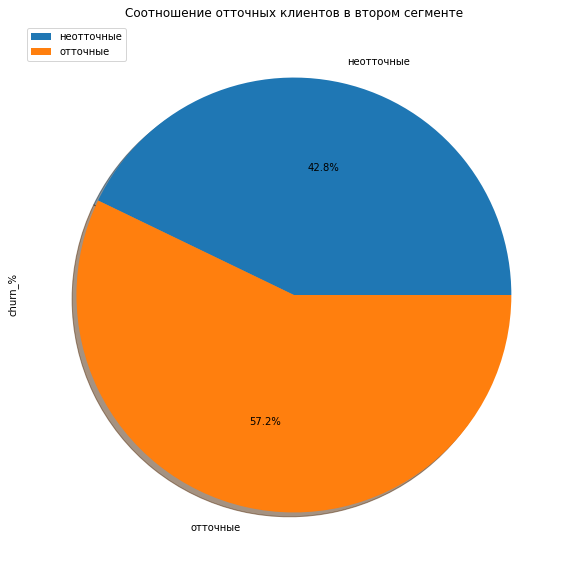

In [80]:
city_l_p.plot(kind='pie', x='churn', y='churn_%',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=2, fontsize=10)
plt.title('Соотношение отточных клиентов в втором сегменте')
plt.show()

В основных данных отточных клиентов примерно 20,4%, а в втором сегменте 57,2%.

In [81]:
query_df = data.query('40 < age and balance > 70000 and gender == "Ж"')# 
count_q = query_df['user_id'].count()
#count_q

In [82]:
query_df_pt = query_df.pivot_table(index='churn', values='user_id', aggfunc='count')
query_df_pt['churn_%'] = (query_df_pt['user_id'] / count_q) * 100
query_df_pt

,user_id,churn_%
churn,,
неотточные,541,51.279621
отточные,514,48.720379


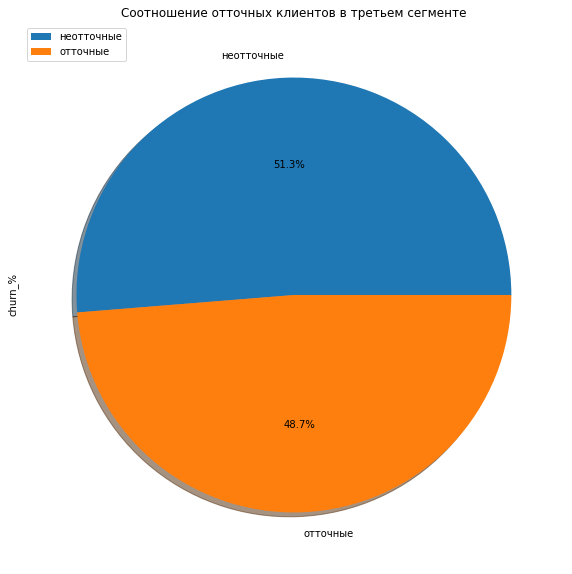

In [83]:
query_df_pt.plot(kind='pie', x='churn', y='churn_%',  
                 figsize=(15, 10),
                 autopct='%1.1f%%',
                 shadow=True)
plt.legend(loc=2, fontsize=10)
plt.title('Соотношение отточных клиентов в третьем сегменте')
plt.show()

В третьем сегменте количество отточных клиентов 48,7%.

### Вывод: 

Проблемными точками является город Ростов Великий, также женщины часто отказываются от услуг банка и высокий поток ушедших среди возрастных людей со средним возрастом 45 лет. Возможна есть проблема с качеством продуктов.

## Проверка гипотез

In [84]:
from scipy import stats as st
import numpy as np

### Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

Проверка гипотезы: средняя доход клиентов Ушёл и Остался одинаковые;

- H_0: Доход(estimated_salary) ушедших клиентов = доходу(estimated_salary) клиентов оставшихся.
- H_1:Доход(estimated_salary) ушедших клиентов ≠ доходу(estimated_salary) клиентов оставшихся.

alpha = 0.05

In [85]:
left_0 = data.query('churn == "отточные"')
stayed_1 = data.query('churn == "неотточные"')
left_0H = left_0['estimated_salary']
stayed_1H = stayed_1['estimated_salary']

In [86]:
alpha = 0.05

results = st.ttest_ind(left_0H, stayed_1H, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.228924613051458
Не получилось отвергнуть нулевую гипотезу


### Проверить гипотезу влияет ли различия возроста между теми клиентами которые ушли и теми, которые остались.

Проверка гипотезы: средняя возраст клиентов Ушёл и Остался одинаковые;

- H_0: Возраст(age) ушедших клиентов = возрасту(age) клиентов оставшихся.
- H_1: Возраст(age) ушедших клиентов ≠ возрасту(age) клиентов оставшихся.

alpha = 0.05

In [87]:
age_0H = left_0['age']
age_1H = stayed_1['age']

In [88]:
results = st.ttest_ind(age_0H, age_1H, equal_var=False)
alpha = 0.05 
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

4.7127272656641046e-179
Отвергаем нулевую гипотезу


### Вывод:

Доход не сильно влияет на отток клиентов, а возраст наоборот имеет значимость для изучения проблемы отказа от услуг банка.

## Общий вывод.

По данным проведённых исследований клиентов регионального банка можно подвести итоги:
- Около 20,4% клиентов ушли из банка.
- Наибольший отток клиентов из города Ростов Великий здесь ушло 32,4% клиентов.
- Мужчин больше чем женщин среди клиентов и они реже уходят из банка чем женщины, среди отточных клиентов женщин больше чем мужчин.
- Основной отток клиентов идет среди возрастных клиентов в возрасте от 40 лет.
- Среди продуктов банка есть большой отток от трех продуктов, а уже с четырьмя продуктами клиентов практически нет.
- Не активные клиенты чаще уходят чем активные, возможна есть проблемы в приложении с которым сложно  взаимодействовать возрастным клиентам.

Можно сегментировать клиентов:
- 1.Житель города Ростов Великий в возрасте 40 лет, чей баланс выше 70 000.
- 2.Клиенты в возрасте от 40 лет, считающейся не активным, чей баланс выше 70 000.
- 3.Женщины в возрасте 40 лет чей баланс выше 70 000.

Общий портрет клиента который решает уйти из банка эта возрастная женщина со средним возрастом около 45 лет являющийся жителем города Ростов Великий, считающейся не активным и использующий от 3 продуктов банка чей баланс в среднем 80 000 рублей. 

Для снижения оттока клиентов следует:
- Провести интервьюирование для клиентов первого сегмента, для выявления причины оттока из города Ростов Великий, проверить наличие возможности удобного получения услуг, например количество и расположения банкоматов и самих банков.
- Для второго сегмента можно рекомендовать провести анализ приложения и сайта банка что бы оптимизировать их для более возрастных клиентов.
- Для третьего сегмента можно провести гендерное исследования и предложить услуги для удержания клиентов женского пола, также можно предложить им дополнительные услуги безопасности в пользовании приложениями банка.
- Провести дополнительные качественные исследования всех отточных сегментов для выявления конкретных причин ухода из банка. Так же стоит предложить специальные стимулирующие  предложения, тем клиентам, которые попали в сегмент склонных к оттоку, например возможна стоит продумать систему бонусов для клиентов имеющих более двух продуктов или для баланс где хранится более 70 000 рублей для удержания клиентов.